# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [6]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path, decimal=',')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [7]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
df['Region'].value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [9]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [10]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [11]:
# This will print basic statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


In [12]:
#plt.boxplot(df['Pop. Density (per sq. mi.)']);

In [13]:
#plt.hist(df['Coastline (coast/area ratio)']);

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- fill the null values           <br> 
2- drop country and region columns         <br>
3- scale the dataset           <br>

In [14]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**fill the null values**

In [15]:
#solution 
df_copy.fillna(df.mean(axis=0), axis=0, inplace=True)

In [16]:
#test 
round(df_copy.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.0
Region                                0.0
Population                            0.0
Area (sq. mi.)                        0.0
Pop. Density (per sq. mi.)            0.0
Coastline (coast/area ratio)          0.0
Net migration                         0.0
Infant mortality (per 1000 births)    0.0
GDP ($ per capita)                    0.0
Literacy (%)                          0.0
Phones (per 1000)                     0.0
Arable (%)                            0.0
Crops (%)                             0.0
Other (%)                             0.0
Climate                               0.0
Birthrate                             0.0
Deathrate                             0.0
Agriculture                           0.0
Industry                              0.0
Service                               0.0
dtype: float64

#### drop country and region columns

In [17]:
#solution
df_copy.drop(['Country', 'Region'],axis=1, inplace=True)

In [18]:
#test 
df_copy.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283


In [19]:
df_copy.to_csv('copy_data.csv')

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [20]:
from sklearn import preprocessing

In [21]:
scaler = preprocessing.MinMaxScaler()
df_copy_scaled = df_copy.copy()
df_copy_scaled[df_copy_scaled.columns] = scaler.fit_transform(df_copy_scaled.values)

In [22]:
df_copy_scaled.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.023631,0.037920,0.002950,0.000000,1.000000,0.851138,0.003663,0.223301,0.002897,0.195299,0.004341,0.814759,0.000000,0.904926,0.657559,0.494148,0.248307,0.356502
1,0.002720,0.001683,0.007658,0.001447,0.364586,0.101800,0.073260,0.836165,0.068573,0.339559,0.087214,0.617369,0.666667,0.180018,0.106740,0.301691,0.189616,0.579596
2,0.025056,0.139485,0.000848,0.000046,0.467650,0.151985,0.100733,0.635922,0.075237,0.051844,0.004933,0.947953,0.000000,0.226750,0.084517,0.131339,0.654628,0.264574
3,0.000039,0.000012,0.017847,0.066949,0.006356,0.036951,0.137363,0.963592,0.250435,0.161005,0.295975,0.625019,0.333333,0.349217,0.035701,0.196156,0.296513,0.564219
4,0.000049,0.000027,0.009348,0.000000,0.626334,0.009317,0.338828,1.000000,0.480008,0.035743,0.000000,0.966702,0.666667,0.032689,0.144262,0.196156,0.296513,0.564219


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

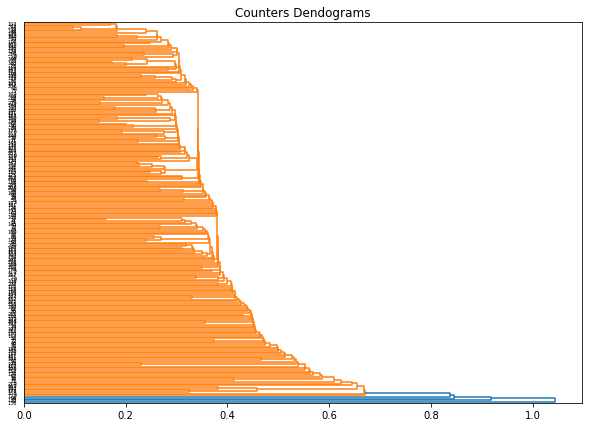

In [23]:
import scipy.cluster.hierarchy as shc
#%matplotlib qt
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='single',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria

#and metric with distance function
#plt.show()

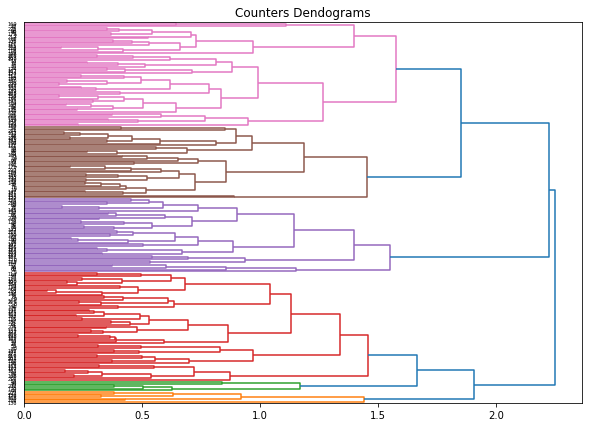

In [24]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='complete',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria

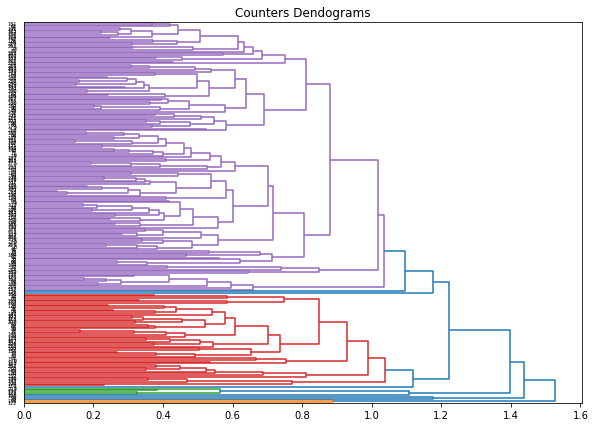

In [25]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='average',metric='euclidean'),orientation='right')

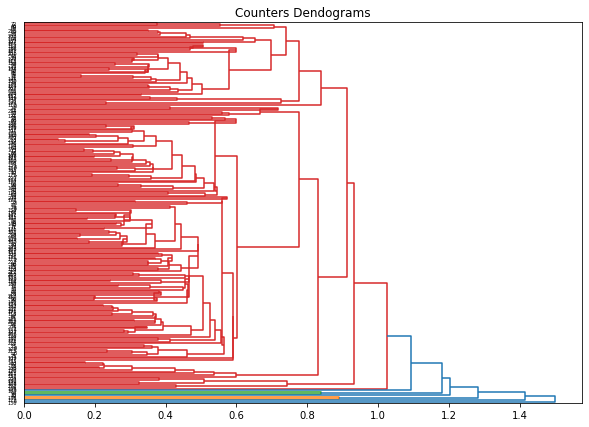

In [26]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='centroid',metric='euclidean'),orientation='right')

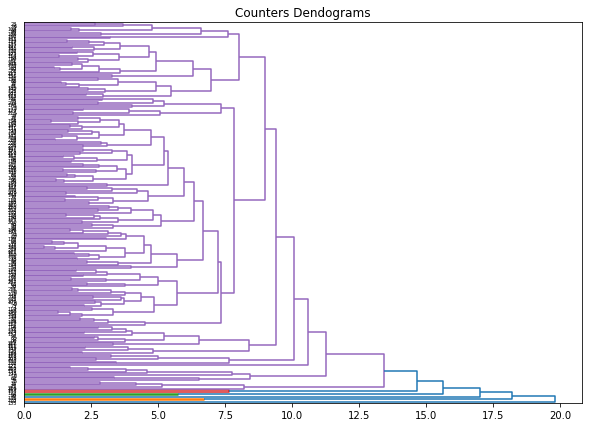

In [27]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='complete',metric='mahalanobis'),orientation='right')

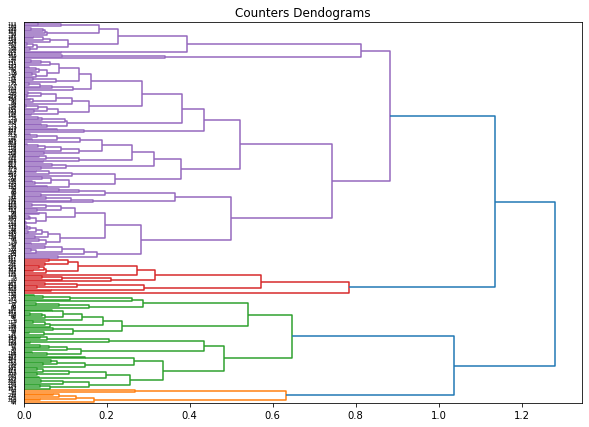

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy_scaled , method='complete',metric='correlation'),orientation='right')

I suggest that the complete method with ecildian as a metric give us 6 obvious clusters, but we will silhouette_score to detrmine the optimum number of clusters.   

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for i in range(2,8):
    ac_ec = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
    print('k:' + str(i) +  '  ' + str(silhouette_score(df_copy_scaled, ac_ec.fit_predict(df_copy_scaled))))

k:2  0.13382059674101338
k:3  0.14848701099839046
k:4  0.1462493696593935
k:5  0.14488871384151908
k:6  0.1523511456177006
k:7  0.13487645770561393


we choose 6 clusters for euclidean metric

In [30]:
#training
from sklearn.cluster import AgglomerativeClustering

ac_ec = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')

In [31]:
silhouette_score(df_copy_scaled, ac_ec.fit_predict(df_copy_scaled))

0.1523511456177006

In [32]:
df2 = df_copy.copy()
df2['Country'] = df['Country']
df2['Region'] = df['Region']
df2['cluster ec'] = ac_ec.fit_predict(df_copy_scaled)
df2[df2['cluster ec'] == 4]

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country,Region,cluster ec
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.200000,2.220000,...,97.780000,3.000000,8.71,6.25,0.150844,0.282711,0.565283,Andorra,WESTERN EUROPE,4
6,13477,102,132.1,59.80,10.76,21.03,8600.0,95.000000,460.000000,0.000000,...,100.000000,2.000000,14.17,5.34,0.040000,0.180000,0.780000,Anguilla,LATIN AMER. & CARIB,4
7,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.000000,549.900000,18.180000,...,77.270000,2.000000,16.93,5.37,0.038000,0.220000,0.743000,Antigua & Barbuda,LATIN AMER. & CARIB,4
10,71891,193,372.5,35.49,0.00,5.89,28000.0,97.000000,516.100000,10.530000,...,89.470000,2.000000,11.03,6.68,0.004000,0.333000,0.663000,Aruba,LATIN AMER. & CARIB,4
11,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.000000,565.500000,6.550000,...,93.410000,1.000000,12.14,7.51,0.038000,0.262000,0.700000,Australia,OCEANIA,4
12,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.000000,452.200000,16.910000,...,82.230000,3.000000,8.74,9.76,0.018000,0.304000,0.678000,Austria,WESTERN EUROPE,4
14,303770,13940,21.8,25.41,-2.20,25.21,16700.0,95.600000,460.600000,0.800000,...,98.800000,2.000000,17.57,9.05,0.030000,0.070000,0.900000,"Bahamas, The",LATIN AMER. & CARIB,4
22,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.000000,851.400000,20.000000,...,80.000000,2.000000,11.40,7.74,0.010000,0.100000,0.890000,Bermuda,NORTHERN AMERICA,4
36,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.000000,552.200000,4.960000,...,95.020000,2.139024,10.78,7.80,0.022000,0.294000,0.684000,Canada,NORTHERN AMERICA,4
38,45436,262,173.4,61.07,18.75,8.19,35000.0,98.000000,836.300000,3.850000,...,96.150000,2.000000,12.74,4.89,0.014000,0.032000,0.954000,Cayman Islands,LATIN AMER. & CARIB,4


In [33]:
from sklearn.cluster import AgglomerativeClustering
for i in range(2,8):
    ac_co = AgglomerativeClustering(n_clusters=i, affinity='correlation', linkage='complete')
    print('k:' + str(i) +  '  ' + str(silhouette_score(df_copy_scaled, ac_co.fit_predict(df_copy_scaled))))

k:2  0.270360796304643
k:3  0.1808076455267447
k:4  0.1722224781869625
k:5  0.15485927948232103
k:6  0.15023584341831858
k:7  0.1449751392054485


we choose 4 clusters for corrlation metric

In [34]:
ac_co = AgglomerativeClustering(n_clusters=4, affinity='correlation', linkage='complete')

In [35]:
df3 = df_copy.copy()
df3['Country'] = df['Country']
df3['Region'] = df['Region']
df3['cluster cor'] = ac_co.fit_predict(df_copy_scaled)
df3[df3['cluster cor'] == 0]

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country,Region,cluster cor
1,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,...,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000,Albania,EASTERN EUROPE,0
2,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,...,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000,Algeria,NORTHERN AFRICA,0
4,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,...,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283,Andorra,WESTERN EUROPE,0
6,13477,102,132.1,59.80,10.760000,21.030000,8600.000000,95.000000,460.000000,0.00,...,100.00,2.0,14.170000,5.340000,0.040000,0.180000,0.780000,Anguilla,LATIN AMER. & CARIB,0
7,69108,443,156.0,34.54,-6.150000,19.460000,11000.000000,89.000000,549.900000,18.18,...,77.27,2.0,16.930000,5.370000,0.038000,0.220000,0.743000,Antigua & Barbuda,LATIN AMER. & CARIB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,25730435,912050,28.2,0.31,-0.040000,22.200000,4800.000000,93.400000,140.100000,2.95,...,96.13,2.0,18.710000,4.920000,0.040000,0.419000,0.541000,Venezuela,LATIN AMER. & CARIB,0
219,84402966,329560,256.1,1.05,-0.450000,25.950000,2500.000000,90.300000,187.700000,19.97,...,74.08,2.0,16.860000,6.220000,0.209000,0.410000,0.381000,Vietnam,ASIA (EX. NEAR EAST),0
220,108605,1910,56.9,9.84,-8.940000,8.030000,17200.000000,82.838278,652.800000,11.76,...,85.30,2.0,13.960000,6.430000,0.010000,0.190000,0.800000,Virgin Islands,LATIN AMER. & CARIB,0
221,16025,274,58.5,47.08,0.038125,35.506964,3700.000000,50.000000,118.600000,5.00,...,70.00,2.0,22.114732,9.241345,0.150844,0.282711,0.565283,Wallis and Futuna,OCEANIA,0


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [36]:
scaler = preprocessing.MaxAbsScaler()
df_copy_maxAbs = df_copy.copy()
df_copy_maxAbs[df_copy.columns] = scaler.fit_transform(df_copy.values)
df_copy_maxAbs.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.023636,0.037920,0.002950,0.000000,1.000000,0.852921,0.012704,0.360,0.003090,0.195299,0.004341,0.8765,0.25,0.918589,0.683927,0.494148,0.264901,0.398323
1,0.002726,0.001684,0.007658,0.001447,-0.213790,0.112558,0.081670,0.865,0.068752,0.339559,0.087214,0.7449,0.75,0.297851,0.175521,0.301691,0.207506,0.606918
2,0.025061,0.139485,0.000848,0.000046,-0.016912,0.162142,0.108893,0.700,0.075415,0.051844,0.004933,0.9653,0.25,0.337867,0.155010,0.131339,0.662252,0.312369
3,0.000044,0.000012,0.017847,0.066949,-0.898092,0.048486,0.145191,0.970,0.250579,0.161005,0.295975,0.7500,0.50,0.442736,0.109953,0.196156,0.312043,0.592540
4,0.000054,0.000027,0.009348,0.000000,0.286210,0.021183,0.344828,1.000,0.480108,0.035743,0.000000,0.9778,0.75,0.171693,0.210155,0.196156,0.312043,0.592540


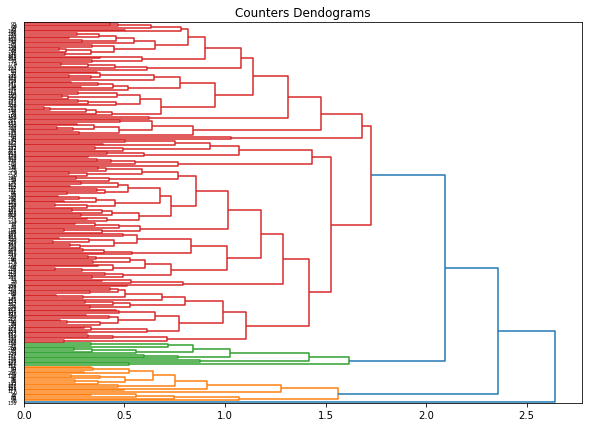

In [37]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy_maxAbs , method='complete',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria

In [38]:
from sklearn.cluster import AgglomerativeClustering
for i in range(2,8):
    ac_ec = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
    print('k:' + str(i) +  '  ' + str(silhouette_score(df_copy_maxAbs, ac_ec.fit_predict(df_copy_maxAbs))))

k:2  0.46217936696579376
k:3  0.24832367547396378
k:4  0.15313168224752977
k:5  0.12704507117256736
k:6  0.12959623424920969
k:7  0.1257813861184106


we choose 3 clusters

In [39]:
ac_ec_maxAbs = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
df4 = df_copy.copy()
df4['Country'] = df['Country']
df4['Region'] = df['Region']
df4['cluster ec'] = ac_ec_maxAbs.fit_predict(df_copy_maxAbs)
df4[df4['cluster ec'] == 0]

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country,Region,cluster ec
1,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,...,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000,Albania,EASTERN EUROPE,0
2,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,...,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000,Algeria,NORTHERN AFRICA,0
3,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,...,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283,American Samoa,OCEANIA,0
4,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,...,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283,Andorra,WESTERN EUROPE,0
6,13477,102,132.1,59.80,10.760000,21.030000,8600.000000,95.000000,460.000000,0.00,...,100.00,2.0,14.170000,5.340000,0.040000,0.180000,0.780000,Anguilla,LATIN AMER. & CARIB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,...,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000,West Bank,NEAR EAST,0
223,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,...,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000,Western Sahara,NORTHERN AFRICA,0
224,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,...,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000,Yemen,NEAR EAST,0
225,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,...,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000,Zambia,SUB-SAHARAN AFRICA,0


we will try using PCA to imporve the score

## Using PCA

In [40]:
df_vals = df_copy.values
df_vals.shape

(227, 18)

In [41]:
A = (df_vals - np.mean(df_vals, axis=0)) / np.std(df_vals, axis=0)
A

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.61913212,
        -0.32114937, -1.15881848],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.57341694,
        -0.71214481,  0.08579033],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.35218232,
         2.38574214, -1.67167236],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.11195045,
         1.42329182, -1.07751238],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.48862922,
         0.05480778, -0.47709808],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.19893785,
        -0.29859194,  0.08579033]])

In [42]:
cov_matrix = np.cov(A.T)
cov_matrix

array([[ 1.00442478e+00,  4.72064664e-01, -2.83152108e-02,
        -6.85007021e-02,  1.09161732e-05,  2.30957216e-02,
        -3.94933424e-02, -4.35677664e-02, -3.09396277e-02,
         1.89033802e-01, -6.10095904e-02, -1.21108290e-01,
        -2.65559351e-02, -4.52749398e-02, -2.84789588e-02,
         3.76425038e-04,  9.95470874e-02, -8.10382961e-02],
       [ 4.72064664e-01,  1.00442478e+00, -6.72130913e-02,
        -9.60506155e-02,  4.76522550e-02, -7.19101610e-03,
         7.24988603e-02,  3.59421659e-02,  5.35957236e-02,
        -8.00263519e-02, -1.44480775e-01,  1.39518889e-01,
        -8.24910722e-02, -6.66829932e-02,  4.02259996e-02,
        -5.06025506e-02,  1.21442370e-01, -5.43188123e-02],
       [-2.83152108e-02, -6.72130913e-02,  1.00442478e+00,
         2.42758942e-01,  1.78777541e-01, -1.44837657e-01,
         1.96616682e-01,  9.54764819e-02,  2.81318248e-01,
        -8.13574184e-02, -3.17952778e-02,  8.22057196e-02,
         6.86068504e-03, -1.59854479e-01, -7.03316040e

In [43]:
eig, vec = np.linalg.eig(cov_matrix)
eig = eig / sum(eig)
eig

array([2.98058440e-01, 1.37774554e-01, 1.03073258e-01, 8.72090594e-02,
       7.31508712e-02, 5.60707698e-02, 4.92196201e-02, 3.90687968e-02,
       3.34161239e-02, 3.00189327e-02, 2.62659607e-02, 2.08042406e-02,
       2.29303306e-02, 1.04532169e-02, 4.73183218e-03, 7.61705383e-03,
       1.36932365e-04, 6.76530329e-09])

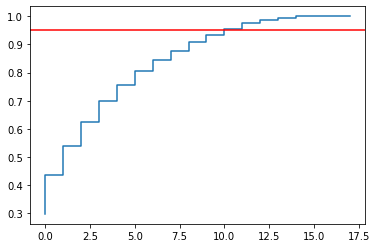

In [44]:
cumsum = np.cumsum(eig)
plt.step(range(len(cumsum)), cumsum)
plt.axhline(y=.95, c='r')

In [45]:
cumsum

array([0.29805844, 0.43583299, 0.53890625, 0.62611531, 0.69926618,
       0.75533695, 0.80455657, 0.84362537, 0.87704149, 0.90706043,
       0.93332639, 0.95413063, 0.97706096, 0.98751417, 0.99224601,
       0.99986306, 0.99999999, 1.        ])

In [46]:
k_eigenvectors = np.array(vec)[:,0:12]
k_eigenvectors.shape

(18, 12)

In [47]:
x_new = A @ k_eigenvectors
print(x_new.shape)

(227, 12)


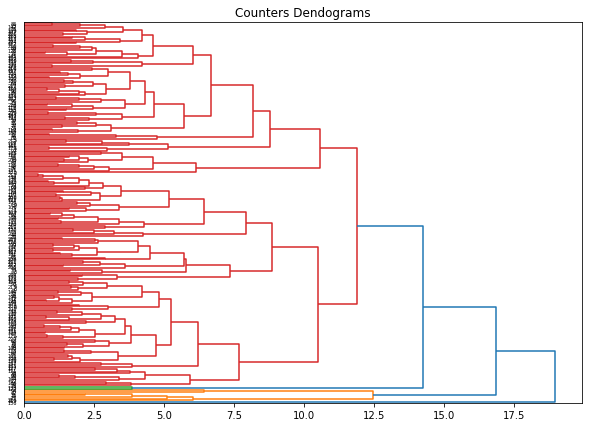

In [48]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=x_new , method='complete',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria


In [49]:
for i in range(2,10):
    ac_co_pca = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
    print('k:' + str(i) +  '  ' + str(silhouette_score(x_new, ac_co_pca.fit_predict(x_new))))

k:2  0.6290632146405453
k:3  0.42755900416291764
k:4  0.43543941090778093
k:5  0.36187727309927725
k:6  0.2328292184937707
k:7  0.17512913785913284
k:8  0.14780848758615397
k:9  0.15339559924583132


we choose 4 clusters

In [50]:
ac_co_pca = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
silhouette_score(x_new, ac_co_pca.fit_predict(x_new))

0.43543941090778093

In [51]:
df5 = df_copy.copy()
df5['Country'] = df['Country']
df5['Region'] = df['Region']
df5['cluster ec pca'] = ac_co_pca.fit_predict(x_new)
df5[df5['cluster ec pca'] == 0]

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country,Region,cluster ec pca
11,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,...,93.41,1.000000,12.14,7.51,0.038,0.262,0.700,Australia,OCEANIA,0
27,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,...,92.15,2.000000,16.56,6.17,0.084,0.400,0.516,Brazil,LATIN AMER. & CARIB,0
36,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,...,95.02,2.139024,10.78,7.80,0.022,0.294,0.684,Canada,NORTHERN AMERICA,0
42,1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,...,83.35,1.500000,13.25,6.97,0.125,0.473,0.403,China,ASIA (EX. NEAR EAST),0
94,1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,...,42.86,2.500000,22.01,8.18,0.186,0.276,0.538,India,ASIA (EX. NEAR EAST),0
169,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,...,92.56,2.139024,9.95,14.65,0.054,0.371,0.575,Russia,C.W. OF IND. STATES,0
214,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,...,80.65,3.000000,14.14,8.26,0.010,0.204,0.787,United States,NORTHERN AMERICA,0


finally i see that using complote method with eculdian distance clustering the countires into 4 groups that has most similar feautres and high silhouette score.

# DBSCAN

In [52]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler()
df_copy_Standard = df_copy.copy()
df_copy_Standard[df_copy_Standard.columns] = z.fit_transform(df_copy_Standard.values)
df_copy_Standard.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.019695,0.027583,-0.199844,-0.293443,4.750696,3.636688,-0.898554,-2.481004,-1.032796,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075,1.619132e+00,-3.211494e-01,-1.158818
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201,-0.398754,-0.518735,0.193960,-0.731200,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-0.814901,5.734169e-01,-7.121448e-01,0.085790
2,0.035618,0.998421,-0.220490,-0.292889,-0.088346,-0.128489,-0.368806,-0.680038,-0.700597,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-0.938514,-3.521823e-01,2.385742e+00,-1.671672
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281495,-0.747988,-0.168902,0.750140,0.103956,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057,1.961110e-16,4.173963e-16,0.000000
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354081,-0.896805,0.930574,0.909049,1.158212,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-0.606178,1.961110e-16,4.173963e-16,0.000000


we will try to find the optimum epsilon for each min_samples

In [53]:
from sklearn.neighbors import NearestNeighbors
from plotnine import ggplot
from sklearn.cluster import DBSCAN

In [54]:
#plot the distances
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
for mins in [2,4,6,8]:
    nn = NearestNeighbors(mins + 1)

    nn.fit(df_copy_Standard)

    distances, neighbors = nn.kneighbors(df_copy_Standard)

    # sort the distances
    distances = np.sort(distances[:, mins], axis = 0)

    distances_df = pd.DataFrame({"distances": distances,
                                 "index": list(range(0,len(distances)))})
    plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
     geom_line(color = "white", size = 2) + theme_minimal() +
     labs(title = "Elbow Method for Choosing eps") +
     theme(panel_grid_minor = element_blank(),
          rect = element_rect(fill = "#202124ff"),
          axis_text = element_text(color = "white"),
          axis_title = element_text(color = "white"),
          plot_title = element_text(color = "white"),
          panel_border = element_line(color = "darkgray"),
          plot_background = element_rect(fill = "#202124ff")
          ))
    #ggsave(plot=plt, filename='elbow.png', dpi=300)
    print(plt)

NameError: name 'aes' is not defined

In [ ]:
l = {(2,3.5), (4,4.5), (6,4.8), (8,5)}
for i in l:
    print(i)
    min_points = i[0]
    epsilon = i[1]
    clustering = DBSCAN(eps=epsilon, min_samples=min_points).fit(df_copy_Standard)
    print(silhouette_score(df_copy_Standard, clustering.labels_)) 
    print(set(clustering.labels_))

we choose min_samples of 2 and epsilon of 3.5

In [ ]:
clustering = DBSCAN(eps=3.5, min_samples=2).fit(df_copy_Standard)
print(silhouette_score(df_copy_Standard, clustering.labels_)) 
clustering.labels_

### DBSCAN Using PCA

In [ ]:
#plot the distances
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
for mins in [2,4,6,8]:
    nn = NearestNeighbors(mins + 1)

    nn.fit(x_new)

    distances, neighbors = nn.kneighbors(x_new)

    # sort the distances
    distances = np.sort(distances[:, mins], axis = 0)

    distances_df = pd.DataFrame({"distances": distances,
                                 "index": list(range(0,len(distances)))})
    plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
     geom_line(color = "white", size = 2) + theme_minimal() +
     labs(title = "Elbow Method for Choosing eps") +
     theme(panel_grid_minor = element_blank(),
          rect = element_rect(fill = "#202124ff"),
          axis_text = element_text(color = "white"),
          axis_title = element_text(color = "white"),
          plot_title = element_text(color = "white"),
          panel_border = element_line(color = "darkgray"),
          plot_background = element_rect(fill = "#202124ff")
          ))
    #ggsave(plot=plt, filename='elbow.png', dpi=300)
    print(plt)

In [ ]:
l = {(2,3.8), (4,4.3), (6,4.5), (8,4.8)}
for i in l:
    print(i)
    min_points = i[0]
    epsilon = i[1]
    clustering = DBSCAN(eps=epsilon, min_samples=min_points).fit(x_new)
    print(silhouette_score(x_new, clustering.labels_)) 
    print(set(clustering.labels_))

In [ ]:
clustering = DBSCAN(eps=3.5, min_samples=2).fit(x_new)
print(silhouette_score(x_new, clustering.labels_)) 
clustering.labels_

finally we see that using PCA and choosing 2 min_samples with 3.8 epsilon will give more score

# KMeans

In [ ]:
from sklearn.cluster import KMeans

selecting the optimum number of clusters

In [ ]:
for i in [2,3,4,5,6,7]:
    print(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_copy_scaled)
    print(silhouette_score(df_copy_scaled, kmeans.labels_))

we will choose 3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_copy_scaled)
print(silhouette_score(df_copy_scaled, kmeans.labels_))
kmeans.labels_

### KMeans Uing PCA

In [ ]:
for i in [2,3,4,5,6,7]:
    print(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x_new)
    print(silhouette_score(x_new, kmeans.labels_))

we wil choose 7 clusters

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(x_new)
print(silhouette_score(x_new, kmeans.labels_))
kmeans.labels_

# EM

In [216]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=3, random_state=3).fit(x_new)
print(silhouette_score(x_new, em.predict(x_new), random_state=0)) 
em.predict(x_new)

0.18932857640447381


array([0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2,
       0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1,
       1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0], dtype=int64)

In [218]:
em = GaussianMixture(n_components=3, random_state=3).fit(df_copy_scaled)
print(silhouette_score(df_copy_scaled, em.predict(df_copy_scaled))) 
em.predict(df_copy_scaled)

0.15047741416431518


array([1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0,
       1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 1, 1], dtype=int64)

In [161]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=5, random_state=3).fit(df_copy)
print(silhouette_score(df_copy, em.predict(df_copy))) 
em.predict(df_copy)

0.09327174330098777


array([0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 0, 0, 2, 0, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 4,
       0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 4, 0, 4, 4,
       4, 4, 4, 0, 4, 4, 3, 2, 4, 4, 4, 0, 4, 4, 0, 2, 0, 4, 4, 4, 0, 4,
       4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0,
       4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 2, 0,
       4, 0, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 2, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 2, 4, 4, 0, 4, 4,
       0, 0, 0, 0, 4, 4, 4], dtype=int64)